# PROJECT

## Used car in Different Cities

In [125]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import seaborn as sns

# Data collection

In [126]:
price = []
company = []
model = []
variant = []
km = []
engine_type = []
location = []
year = []
for i in range(1,100):
    url1 = 'https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city='+str(i)
    page = requests.get(url1)
    soup = BeautifulSoup(page.text)
    file = soup.find_all('div', class_="cr_prc")

    for i in file:
        a = i.text
        price.append(a.split()[0])

    file = soup.find_all('div', class_='details_out')

    for i in file:
        a = i.text.split()
        model.append(a[2])
        year.append(*a[0].split())
        company.append(a[1])
        variant.append(a[3])

    file = soup.find_all('div', class_='info_cr_new')

    for i in file:
        a = i.text
        km.append(a.split("|")[0])
        engine_type.append(a.split("|")[1])
        location.append(a.split("|")[2].split()[0])

# Data-Frame

In [269]:
data = {"Company":company, "Model":model, "Variant":variant,"Engine Type":engine_type, "Year":year, "Driven":km, "Price":price, "Location":location}

In [270]:
df = pd.DataFrame(data)
df

,Company,Model,Variant,Engine Type,Year,Driven,Price,Location
0,Nissan,Terrano,XL,Diesel,2015,"78,254 KMs","₹4,28,000",Gurgaon
1,Hyundai,Elite,i20,Petrol,2015,"59,235 KMs","₹5,21,000",Mumbai
2,Maruti,Suzuki,Swift,Diesel,2017,"31,000 KMs","₹6,40,000",Delhi
3,Maruti,Suzuki,Baleno,Petrol,2019,"38,807 KMs","₹6,50,000",Ranchi
4,Maruti,Suzuki,Baleno,Petrol,2021,"14,213 KMs","₹7,20,000",Delhi
...,...,...,...,...,...,...,...,...
3161,Kia,Sonet,GTX,Petrol,2021,"22,379 KMs","₹11,18,000",Zirakpur
3162,Toyota,Corolla,Altis,Petrol,2017,"49,531 KMs","₹10,31,000",Zirakpur
3163,Kia,Sonet,GTX,Petrol,2020,"14,454 KMs","₹10,58,000",Zirakpur
3164,Honda,City,VX,Petrol,2017,"72,043 KMs","₹7,23,000",Mumbai


In [129]:
# df.to_csv("Aman_Project_Page_100.csv")

# Data Cleaning

## - Type Casting

In [273]:
df['Year'] = df['Year'].astype('int32')

In [274]:
df['Price'] = [re.sub(r"[^\d+]","",i)for i in df['Price']]
df['Price'] = df['Price'].astype('int32')

In [275]:
df['Driven'] = [re.sub(r"[^\d+]","",i) for i in df['Driven']]
df['Driven'] = df['Driven'].astype('int32')

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3166 entries, 0 to 3165
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      3166 non-null   object
 1   Model        3166 non-null   object
 2   Variant      3166 non-null   object
 3   Engine Type  3166 non-null   object
 4   Year         3166 non-null   int32 
 5   Driven       3166 non-null   int32 
 6   Price        3166 non-null   int32 
 7   Location     3166 non-null   object
dtypes: int32(3), object(5)
memory usage: 160.9+ KB


In [277]:
# Year wise calculations KDE ==> Done
# Company wise bar plot ==> Done
# Model wise
# Engine type and year wise Voilen ==> done 
# Price wise (scattler)
# Location wise
# Price wise Year
# Company wise pie plot ==> done

In [278]:
df

,Company,Model,Variant,Engine Type,Year,Driven,Price,Location
0,Nissan,Terrano,XL,Diesel,2015,78254,428000,Gurgaon
1,Hyundai,Elite,i20,Petrol,2015,59235,521000,Mumbai
2,Maruti,Suzuki,Swift,Diesel,2017,31000,640000,Delhi
3,Maruti,Suzuki,Baleno,Petrol,2019,38807,650000,Ranchi
4,Maruti,Suzuki,Baleno,Petrol,2021,14213,720000,Delhi
...,...,...,...,...,...,...,...,...
3161,Kia,Sonet,GTX,Petrol,2021,22379,1118000,Zirakpur
3162,Toyota,Corolla,Altis,Petrol,2017,49531,1031000,Zirakpur
3163,Kia,Sonet,GTX,Petrol,2020,14454,1058000,Zirakpur
3164,Honda,City,VX,Petrol,2017,72043,723000,Mumbai


# Data Visualization

In [279]:
df = df.drop_duplicates()

In [280]:
from matplotlib import pyplot as plt

- Analysis of the used car market in India:
- the number of used cars available for sale
- the average price of used cars

In [327]:
df

,Company,Model,Variant,Engine Type,Year,Driven,Price,Location
0,Nissan,Terrano,XL,Diesel,2015,78254,428000,Gurgaon
1,Hyundai,Elite,i20,Petrol,2015,59235,521000,Mumbai
2,Maruti,Suzuki,Swift,Diesel,2017,31000,640000,Delhi
3,Maruti,Suzuki,Baleno,Petrol,2019,38807,650000,Ranchi
4,Maruti,Suzuki,Baleno,Petrol,2021,14213,720000,Delhi
...,...,...,...,...,...,...,...,...
3107,Hyundai,Elite,i20,Petrol,2016,61672,560000,Nagpur
3109,MG,Hector,Plus,Petrol,2022,22040,1850000,Navi
3137,Hyundai,Xcent,S,Petrol,2015,39200,499000,Tumkur
3138,Mahindra,XUV500,W6,Diesel,2014,114602,850000,Hyderabad


<function matplotlib.pyplot.show(close=None, block=None)>

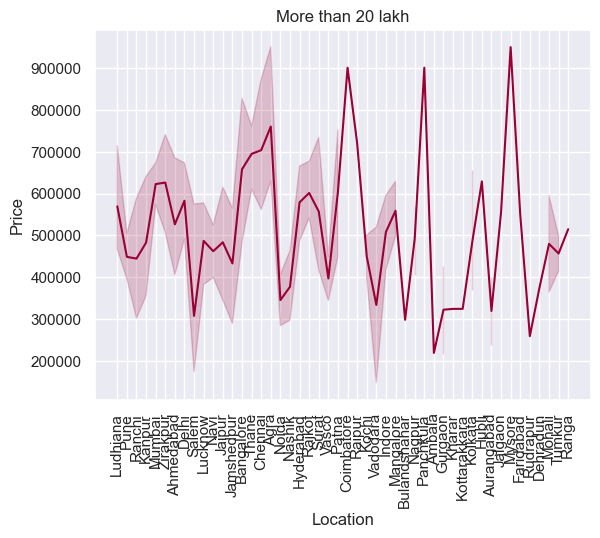

In [338]:
max_pr
sns.lineplot(x = "Location", y = "Price", data = df_less_ten, color='#990033')
plt.title("More than 20 lakh")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

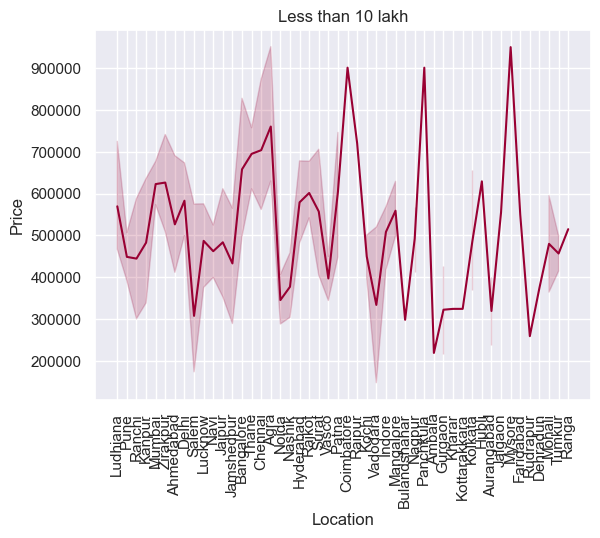

In [329]:
df_less_ten = df[df['Price']<1000000].value_counts().reset_index()
sns.lineplot(x = "Location", y = "Price", data = df_less_ten, color='#990033')
plt.title("Less than 10 lakh")
plt.xticks(rotation=90)
plt.show

- Analysis of the used car market in a specific city
- the average price of used cars in that city

- Analysis of the factors that affect the price of used cars: 
- the age of the car and the demand for the car.

# Que. 
- Which year is having max count of manufacturing

- Vehicles having max number of year manufacturing count

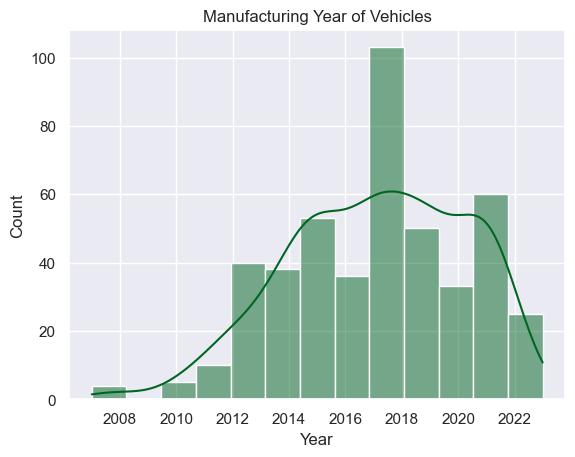

In [295]:
# Year wise
sns.histplot(data=df, x="Year",color='#006622', kde=True)
plt.title("Manufacturing Year of Vehicles")
plt.ylabel("Count")
plt.show()

# Que. 
- Vehicle having price year wise

In [256]:
# Prices mean
#df.pivot_table(index = ['Year'], aggfunc ='size')
pr_yr = df.groupby(df['Year'])['Price'].sum().reset_index()
pr_yr

,Year,Price
0,2007,290000
1,2008,499000
2,2010,1916000
3,2011,4700000
4,2012,17866000
5,2013,12055000
6,2014,25814710
7,2015,55606999
8,2016,40148999
9,2017,99480800


# Que.
- Company wise price

In [293]:
# price plot
(df.groupby(df['Company'])['Price'].mean().reset_index())

,Company,Price
0,Audi,3.560200e+06
1,BMW,4.572148e+06
2,Chevrolet,1.883333e+05
3,Datsun,3.475000e+05
4,Ford,1.533033e+06
5,Honda,6.291579e+05
6,Hyundai,6.642153e+05
7,Jaguar,3.515000e+06
8,Jeep,2.563750e+06
9,Kia,1.658500e+06


# Que.
- Company = price < 10 lac
- Company = price > 20 lac

In [333]:
low_pr = df[df['Price']<=1000000]
max_pr = df[df['Price']>2000000]

In [334]:
max_pr

,Company,Model,Variant,Engine Type,Year,Driven,Price,Location
5,Jeep,Compass,Limited,Diesel,2020,17953,2650000,Bangalore
6,BMW,5,Series,Diesel,2020,10000,5500000,Mumbai
32,Audi,A5,Sportback,Diesel,2018,48000,3700000,Delhi
37,Mercedes-Benz,GLS,Grand,Diesel,2017,60000,5765000,Delhi
96,Mercedes-Benz,C-Class,C,Diesel,2017,63000,2650000,Mumbai
...,...,...,...,...,...,...,...,...
2882,Land,Rover,Discovery,Diesel,2018,35153,3790000,Karnal
2915,Toyota,Fortuner,Legender,Diesel,2021,28000,4650000,Pune
2945,Mahindra,XUV700,AX,Diesel,2022,21148,2700000,Mumbai
2981,Mercedes-Benz,GLE,250,Diesel,2016,100000,3450000,Pune


# Que.
- Engine type max count

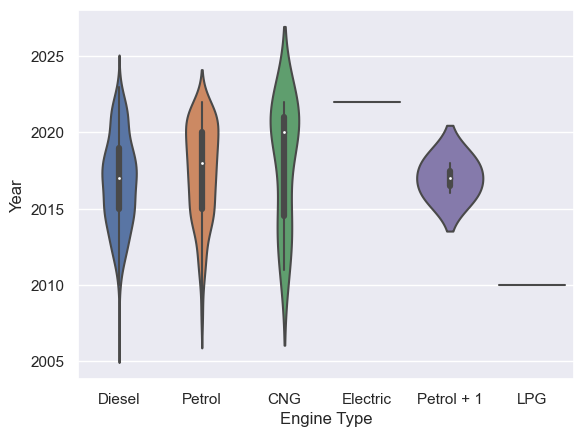

In [205]:
# Engine type and year wise
sns.violinplot(x=df["Engine Type"], y=df["Year"])
plt.show()

# Que.
- Company wise no. of count

In [231]:
dup_company = df.pivot_table(index = ['Company'], aggfunc ='size')
dup_company.reset_index()

,Company,0
0,Audi,15
1,BMW,21
2,Chevrolet,3
3,Datsun,2
4,Ford,15
5,Honda,38
6,Hyundai,72
7,Jaguar,3
8,Jeep,4
9,Kia,6


In [232]:
df['Company'].unique()

array(['Nissan', 'Hyundai', 'Maruti', 'Jeep', 'BMW', 'Tata', 'Honda',
       'Renault', 'Skoda', 'Mahindra', 'Toyota', 'Kia', 'Volkswagen',
       'Audi', 'Mercedes-Benz', 'Land', 'Ford', 'Porsche', 'MG', 'Volvo',
       'Datsun', 'Jaguar', 'Ssangyong', 'Chevrolet', 'MINI'], dtype=object)

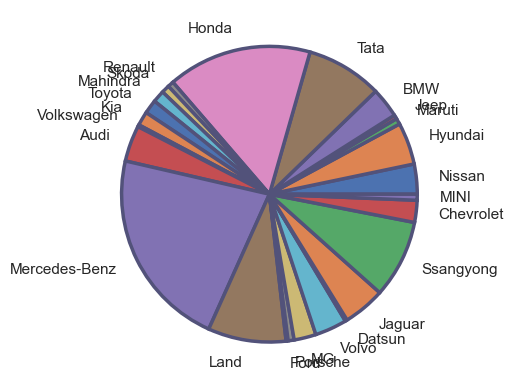

In [233]:
# Company wise pie plot
plt.pie(dup_company, labels=df['Company'].unique(), labeldistance=1.15, wedgeprops = { 'linewidth' : 2.5, 'edgecolor' : '#52527a' });

# Que.
- Location wise no. of count

In [240]:
loc_wise = df.pivot_table(index = ['Location'], aggfunc ='size').reset_index()
loc_wise

,Location,0
0,Agra,4
1,Ahmedabad,14
2,Ambala,1
3,Aurangabad,2
4,Bangalore,29
5,Bulandshahar,1
6,Chandigarh,1
7,Chennai,13
8,Coimbatore,4
9,Dehradun,2


# Que. 
- Driven year wise

In [248]:
(df.pivot_table(index=df['Driven'], aggfunc='size').reset_index())

,Driven,0
0,1413,1
1,3000,1
2,4077,1
3,4177,1
4,4221,1
...,...,...
365,159100,1
366,164000,1
367,173000,1
368,176000,1


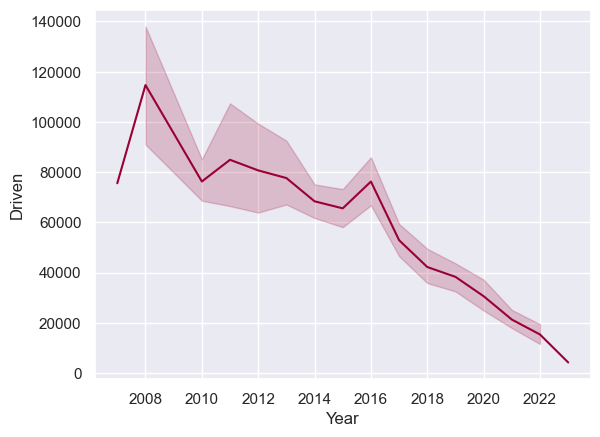

In [160]:
sns.lineplot(x = "Year", y = "Driven", data = df, color='#990033')
plt.show()

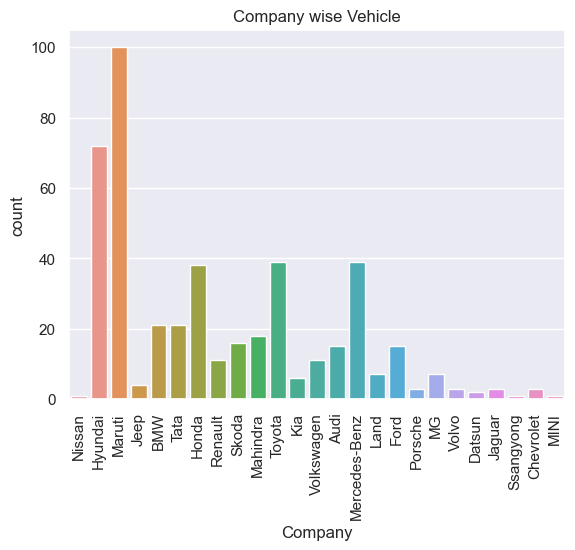

In [249]:
sns.countplot(x='Company', data=df)
plt.xticks(rotation=90)
plt.title("Company wise Vehicle")
plt.show()

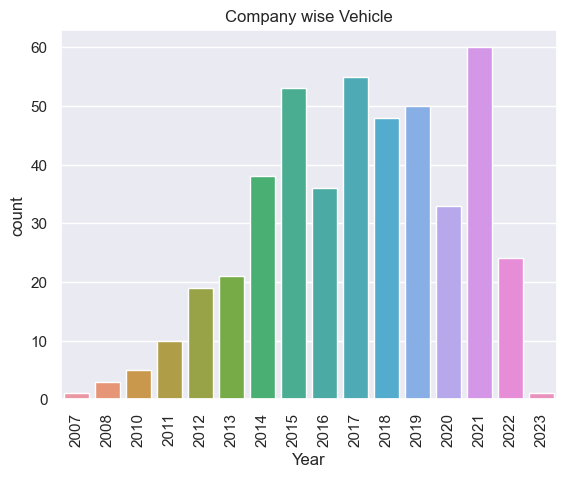

In [250]:
sns.countplot(x='Year', data=df)
plt.xticks(rotation=90)
plt.title("Company wise Vehicle")
plt.show()

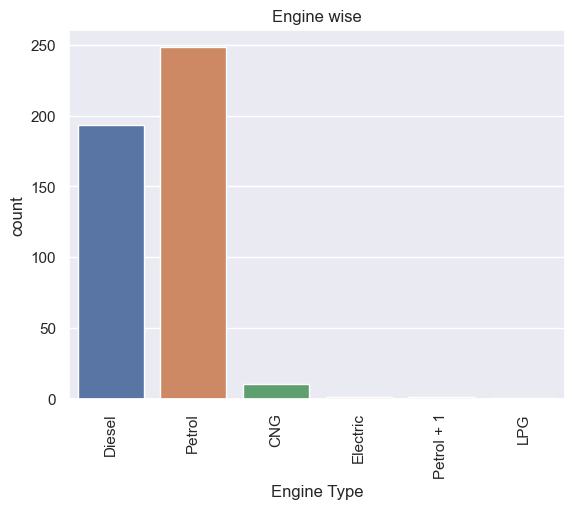

In [251]:
sns.countplot(x='Engine Type', data=df)
plt.xticks(rotation=90)
plt.title("Engine wise")
plt.show()